In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 2: Load dataset
df = pd.read_csv("/content/fruits_dataset.csv")

In [4]:
print(df.head())

   Weight (g)  Size (cm)   Fruit
0  143.705250   7.383648   Apple
1  186.194138   8.470268  Orange
2  175.594880   6.612332   Apple
3  153.942330   7.386570   Apple
4  151.222192   6.599086   Apple


In [5]:
# Step 3: Encode labels (Apple=0, Orange=1)
le = LabelEncoder()
df['Fruit'] = le.fit_transform(df['Fruit'])

In [6]:
# Step 4: Split into features (X) and target (y)
X = df[['Weight (g)', 'Size (cm)']]
y = df['Fruit']

In [7]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train SVM model
model = SVC(kernel='linear')  # Linear kernel for simplicity
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Step 7: Predictions
y_pred = model.predict(X_test)

In [10]:
# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

       Apple       0.80      1.00      0.89         4
      Orange       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



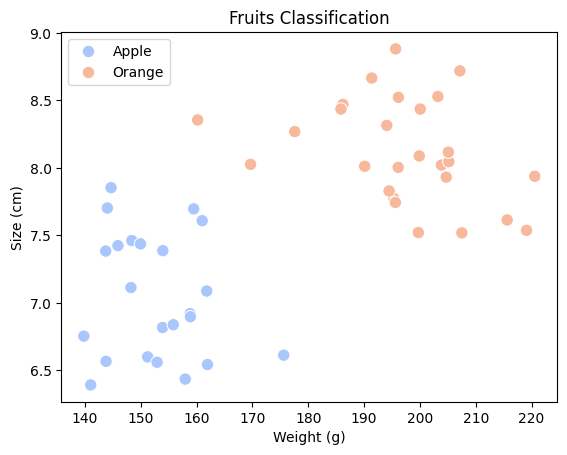

In [11]:
# Step 9: Visualization
sns.scatterplot(data=df, x='Weight (g)', y='Size (cm)', hue=le.inverse_transform(y), palette='coolwarm', s=80)
plt.title("Fruits Classification")
plt.show()